In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import cv2

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root = '../data/',train= True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=0)

testset = torchvision.datasets.CIFAR10(root = '../data/',train= False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


(224, 224, 3)


'\ndef imshow(img):\n    img = cv2.resize(img,(224,224))\n    img = img /2 +0.5\n    npimg = img.numpy()\n    plt.imshow(np.transpose(npimg,(1,2,0)))\n    \ndataiter = iter(trainloader)\nimages, labels = dataiter.next()\n\nimshow(torchvision.utils.make_grid(images))\n\n'

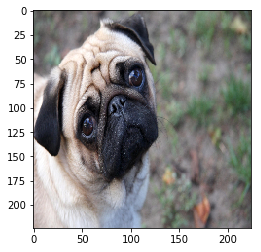

In [3]:
img = cv2.imread('../data/deconv/pug.jpg')
img = cv2.resize(img, (224,224))
print(img.shape)
im2 = img.copy()
im2[:,:,0] = img[:,:,2]
im2[:,:,2] = img[:,:,0]
plt.imshow(im2)

img = transform(im2)
img = img.unsqueeze_(0)
"""
def imshow(img):
    img = cv2.resize(img,(224,224))
    img = img /2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

"""

In [4]:
vgg16 = models.vgg16(pretrained=True)

In [5]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [6]:
output = vgg16(img)

for i in range(1,6):
    top_value, top_indeces = torch.topk(output,i)
print(top_value,top_indeces)

tensor([[ 19.8055,  16.2226,  15.9092,  13.1395,  12.2808]]) tensor([[ 254,  243,  245,  242,  262]])
